In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


#Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
#解决imshow不显示的bug
import pylab

print(tf.__version__)

1.12.0


In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
### 转换为浮点数
train_images = train_images / 255.0
test_images = test_images / 255.0


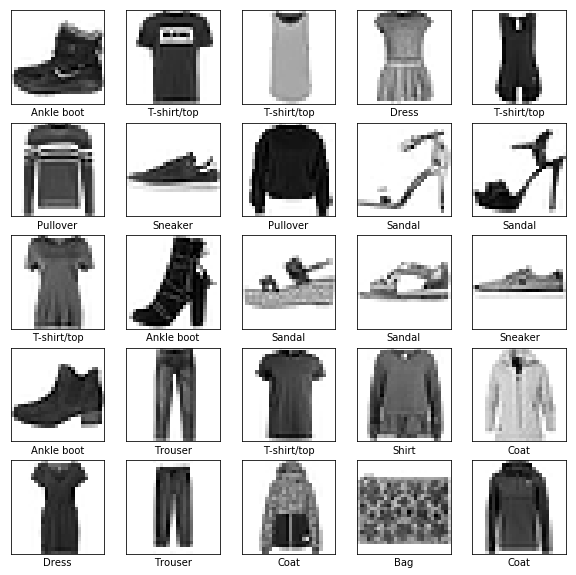

In [5]:
##显示训练集前25张图片
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [6]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.4935 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3723 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3356 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3094 - acc: 0.8860
Epoch 5/5
10000/10000 [==============================] - 0s 25us/step


In [7]:
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


Test accuracy: 0.8735
[4.11963083e-05 1.68249159e-07 1.03221355e-05 1.39662887e-07
 2.99348176e-05 1.63250640e-02 6.02248256e-05 4.48165424e-02
 3.04080371e-04 9.38412368e-01]
9
9


In [8]:

#绘制成图
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

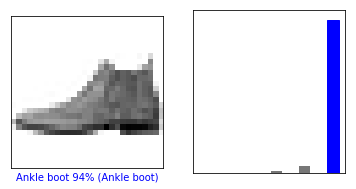

In [9]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


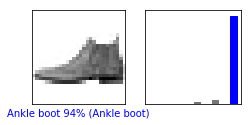

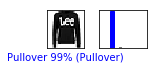

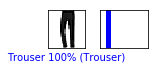

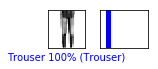

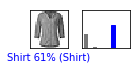

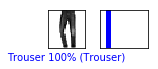

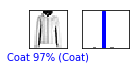

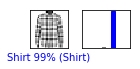

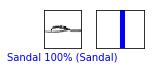

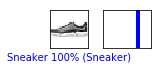

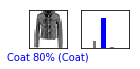

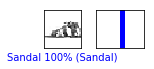

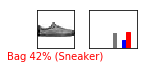

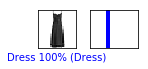

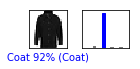

In [10]:

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  plt.show()

(28, 28)
(1, 28, 28)
[[4.1196236e-05 1.6824899e-07 1.0322116e-05 1.3966289e-07 2.9934818e-05
  1.6325064e-02 6.0224767e-05 4.4816542e-02 3.0408037e-04 9.3841237e-01]]


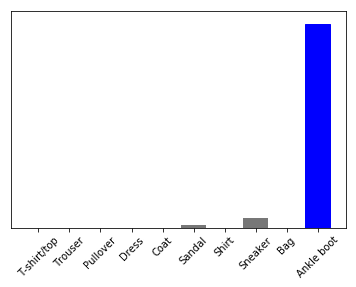

In [13]:

# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)